Im going to compare a few different algorithms based on performance in classifying the Fashion_mnist dataset which contains 70000 depixelated (28x28) photos of Zalando's clothing articles separated into 10 classes.
The algorithms im going to compare are:
    <br>-Decision Tree Classifier
    <br>    -Random Forest Classifier
    <br>    -Naive Bayes
    <br>    -Support Vector Machines
    <br>    -Convolutional Neural Network
<br>I will also try to optimize those models using GridSearch

In [104]:
import pandas as pd
import tensorflow
import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [11]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
# copies made for Neural Network later on that does not need reshaping of the data
x_test_cnn = x_test.copy()
x_train_cnn = x_train.copy()
# we need to reshape our data since some classifiers work in 2D and the data comes in 3D
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
# for grid search im only gonna use the first 10% of the training data since it takes days to compile on full set
x_train_grid_search = x_train[:6000, :]
y_train_grid_search = y_train[:6000]


1. Decision Tree Classifier

In [12]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
cm_dtc = confusion_matrix(y_pred, y_test)
acc_dtc = accuracy_score(y_pred, y_test)
report_dtc = classification_report(y_pred, y_test)

# Grid search optimization
dtc_params = {
    'max_depth': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dtc_grid_search = GridSearchCV(DecisionTreeClassifier(), dtc_params, cv=5).fit(x_train_grid_search, y_train_grid_search)
dtc_grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [21]:
model_tuned = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 2, min_samples_split = 5)
model_tuned.fit(x_train, y_train)
y_pred = model_tuned.predict(x_test)
cm_dtc_tuned = confusion_matrix(y_pred, y_test)
acc_dtc_tuned = accuracy_score(y_pred, y_test)
report_dtc_tuned = classification_report(y_pred, y_test)

In [22]:
cm_dtc

array([[725,   4,  22,  44,  17,   0, 150,   0,   8,   1],
       [  3, 947,   2,  29,   6,   3,   6,   0,   2,   0],
       [ 28,   2, 650,  17, 168,   2, 140,   0,  17,   0],
       [ 38,  24,  17, 784,  52,   3,  42,   0,   7,   0],
       [  9,   9, 162,  60, 638,   1,  93,   0,  16,   0],
       [  1,   0,   1,   2,   1, 877,   3,  45,  13,  20],
       [183,  11, 131,  54, 108,   3, 546,   0,  18,   0],
       [  1,   0,   0,   0,   0,  60,   0, 883,   6,  63],
       [ 10,   1,  12,  10,  10,  18,  17,   6, 909,   4],
       [  2,   2,   3,   0,   0,  33,   3,  66,   4, 912]], dtype=int64)

In [23]:
cm_dtc_tuned

array([[773,  10,  13,  33,   3,   2, 140,   0,   4,   1],
       [  3, 928,   0,  11,   2,   2,   4,   0,   3,   0],
       [ 28,   4, 665,  26, 124,   0, 162,   0,  17,   1],
       [ 41,  40,   8, 811,  39,   1,  37,   0,   8,   0],
       [ 12,   7, 242,  62, 736,   1, 140,   0,  22,   0],
       [  0,   0,   0,   1,   0, 875,   3,  29,   6,  20],
       [127,   9,  62,  49,  94,   0, 498,   0,  29,   1],
       [  1,   0,   0,   0,   0,  65,   0, 928,  10,  66],
       [ 11,   1,   9,   6,   2,  19,  14,   5, 899,   3],
       [  4,   1,   1,   1,   0,  35,   2,  38,   2, 908]], dtype=int64)

In [24]:
acc_dtc

0.7871

In [25]:
acc_dtc_tuned

0.8021

In [26]:
print(report_dtc)

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       971
           1       0.95      0.95      0.95       998
           2       0.65      0.63      0.64      1024
           3       0.78      0.81      0.80       967
           4       0.64      0.65      0.64       988
           5       0.88      0.91      0.89       963
           6       0.55      0.52      0.53      1054
           7       0.88      0.87      0.88      1013
           8       0.91      0.91      0.91       997
           9       0.91      0.89      0.90      1025

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



In [27]:
print(report_dtc_tuned)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       979
           1       0.93      0.97      0.95       953
           2       0.67      0.65      0.66      1027
           3       0.81      0.82      0.82       985
           4       0.74      0.60      0.66      1222
           5       0.88      0.94      0.90       934
           6       0.50      0.57      0.53       869
           7       0.93      0.87      0.90      1070
           8       0.90      0.93      0.91       969
           9       0.91      0.92      0.91       992

    accuracy                           0.80     10000
   macro avg       0.80      0.81      0.80     10000
weighted avg       0.80      0.80      0.80     10000



2. Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
cm_rfc = confusion_matrix(y_pred, y_test)
acc_rfc = accuracy_score(y_pred, y_test)
report_rfc = classification_report(y_pred, y_test)

# Grid search optimization
rfc_params = {
    'max_depth': [1, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rfc_grid_search = GridSearchCV(RandomForestClassifier(), rfc_params, cv=5).fit(x_train_grid_search, y_train_grid_search)
rfc_grid_search.best_params_

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [31]:
model_tuned = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, min_samples_split = 2)
model_tuned.fit(x_train, y_train)
y_pred = model_tuned.predict(x_test)
cm_rfc_tuned = confusion_matrix(y_pred, y_test)
acc_rfc_tuned = accuracy_score(y_pred, y_test)
report_rfc_tuned = classification_report(y_pred, y_test)

In [32]:
cm_rfc

array([[859,   5,  13,  19,   1,   0, 148,   0,   0,   0],
       [  0, 960,   0,   3,   1,   0,   0,   0,   2,   0],
       [ 11,   4, 790,  14,  91,   0, 118,   0,   5,   0],
       [ 36,  23,  11, 910,  36,   1,  30,   0,   2,   0],
       [  3,   2, 125,  28, 817,   0,  87,   0,   5,   0],
       [  1,   0,   0,   0,   0, 956,   0,  11,   2,   7],
       [ 80,   5,  59,  24,  51,   0, 601,   0,   7,   1],
       [  0,   0,   0,   0,   0,  31,   0, 951,   3,  39],
       [ 10,   1,   2,   2,   3,   2,  16,   0, 973,   2],
       [  0,   0,   0,   0,   0,  10,   0,  38,   1, 951]], dtype=int64)

In [33]:
cm_rfc_tuned

array([[832,   3,   8,  22,   1,   0, 185,   0,   0,   0],
       [  0, 933,   0,   1,   1,   0,   1,   0,   1,   0],
       [ 18,  11, 729,  13, 102,   0, 152,   0,  11,   0],
       [ 57,  41,  11, 901,  45,   1,  40,   0,   5,   0],
       [  5,   4, 201,  35, 799,   0, 114,   0,   5,   0],
       [  1,   0,   0,   0,   0, 932,   0,   9,   2,   5],
       [ 73,   6,  46,  25,  49,   0, 487,   0,   8,   1],
       [  0,   0,   0,   0,   0,  48,   0, 922,   4,  47],
       [ 14,   2,   5,   3,   3,   2,  21,   0, 963,   2],
       [  0,   0,   0,   0,   0,  17,   0,  69,   1, 945]], dtype=int64)

In [34]:
acc_rfc

0.8768

In [35]:
acc_rfc_tuned

0.8443

In [36]:
print(report_rfc)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1045
           1       0.96      0.99      0.98       966
           2       0.79      0.76      0.78      1033
           3       0.91      0.87      0.89      1049
           4       0.82      0.77      0.79      1067
           5       0.96      0.98      0.97       977
           6       0.60      0.73      0.66       828
           7       0.95      0.93      0.94      1024
           8       0.97      0.96      0.97      1011
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [37]:
print(report_rfc_tuned)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1051
           1       0.93      1.00      0.96       937
           2       0.73      0.70      0.72      1036
           3       0.90      0.82      0.86      1101
           4       0.80      0.69      0.74      1163
           5       0.93      0.98      0.96       949
           6       0.49      0.70      0.57       695
           7       0.92      0.90      0.91      1021
           8       0.96      0.95      0.96      1015
           9       0.94      0.92      0.93      1032

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.85      0.84      0.85     10000



3. Naive Bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB


model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
cm_nb = confusion_matrix(y_pred, y_test)
acc_nb = accuracy_score(y_pred, y_test)
report_nb = classification_report(y_pred, y_test)

# Grid search optimization
nb_params = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}
nb_grid_search = GridSearchCV(MultinomialNB(), nb_params, cv=5).fit(x_train_grid_search, y_train_grid_search)
nb_grid_search.best_params_

{'alpha': 0.5}

In [39]:
model_tuned = MultinomialNB(alpha=0.5)
model_tuned.fit(x_train, y_train)
y_pred = model_tuned.predict(x_test)
cm_nb_tuned = confusion_matrix(y_pred, y_test)
acc_nb_tuned = accuracy_score(y_pred, y_test)
report_nb_tuned = classification_report(y_pred, y_test)

In [40]:
cm_nb

array([[776,  17,   8,  26,   0,   1, 230,   0,   7,   0],
       [  1, 872,   0,   9,   1,   0,   1,   0,   0,   0],
       [  5,  12, 569,   1, 225,   0, 138,   0,   3,   1],
       [112,  84,  13, 875, 112,   0,  85,   0,  49,   1],
       [  6,   8, 300,  25, 605,   0, 335,   0,  83,   0],
       [  0,   0,   0,   0,   0, 137,   0,  25,   3,  44],
       [ 80,   5,  85,  61,  48,   8, 161,   0,  44,  12],
       [  0,   0,   0,   0,   0, 504,   0, 920,  12, 103],
       [ 20,   2,  25,   3,   9,   6,  50,   0, 799,   1],
       [  0,   0,   0,   0,   0, 344,   0,  55,   0, 838]], dtype=int64)

In [41]:
cm_nb_tuned

array([[776,  17,   8,  27,   0,   1, 230,   0,   7,   0],
       [  1, 872,   0,   9,   1,   0,   1,   0,   0,   0],
       [  5,  12, 569,   1, 227,   0, 139,   0,   3,   1],
       [112,  84,  13, 874, 112,   0,  85,   0,  49,   1],
       [  6,   8, 300,  25, 602,   0, 332,   0,  83,   0],
       [  0,   0,   0,   0,   0, 138,   0,  25,   3,  44],
       [ 80,   5,  85,  61,  49,   8, 163,   0,  43,  12],
       [  0,   0,   0,   0,   0, 503,   0, 920,  10, 103],
       [ 20,   2,  25,   3,   9,   7,  50,   0, 802,   1],
       [  0,   0,   0,   0,   0, 343,   0,  55,   0, 838]], dtype=int64)

In [42]:
acc_nb

0.6552

In [43]:
acc_nb_tuned

0.6554

In [44]:
print(report_nb)

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1065
           1       0.87      0.99      0.93       884
           2       0.57      0.60      0.58       954
           3       0.88      0.66      0.75      1331
           4       0.60      0.44      0.51      1362
           5       0.14      0.66      0.23       209
           6       0.16      0.32      0.21       504
           7       0.92      0.60      0.72      1539
           8       0.80      0.87      0.83       915
           9       0.84      0.68      0.75      1237

    accuracy                           0.66     10000
   macro avg       0.66      0.65      0.63     10000
weighted avg       0.74      0.66      0.68     10000



In [45]:
print(report_nb_tuned)

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1066
           1       0.87      0.99      0.93       884
           2       0.57      0.59      0.58       957
           3       0.87      0.66      0.75      1330
           4       0.60      0.44      0.51      1356
           5       0.14      0.66      0.23       210
           6       0.16      0.32      0.22       506
           7       0.92      0.60      0.73      1536
           8       0.80      0.87      0.84       919
           9       0.84      0.68      0.75      1236

    accuracy                           0.66     10000
   macro avg       0.66      0.65      0.63     10000
weighted avg       0.74      0.66      0.68     10000



4. Support Vector Machine

In [46]:
from sklearn.svm import SVC


model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
cm_svm = confusion_matrix(y_pred, y_test)
acc_svm = accuracy_score(y_pred, y_test)
report_svm = classification_report(y_pred, y_test)

# Grid search optimization
svm_params = {
    'C': [0.1, 1, 2],
    'kernel': ['linear', 'poly', 'sigmoid']
}
svm_grid_search = GridSearchCV(SVC(), svm_params, cv=5).fit(x_train_grid_search, y_train_grid_search)
svm_grid_search.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [47]:
model_tuned = SVC(C=0.1, kernel='linear')
model_tuned.fit(x_train, y_train)
y_pred = model_tuned.predict(x_test)
cm_svm_tuned = confusion_matrix(y_pred, y_test)
acc_svm_tuned = accuracy_score(y_pred, y_test)
report_svm_tuned = classification_report(y_pred, y_test)

In [48]:
cm_svm

array([[857,   4,  11,  27,   1,   0, 135,   0,   3,   0],
       [  0, 962,   2,   3,   1,   0,   1,   0,   1,   0],
       [ 16,   2, 816,  11,  87,   0, 104,   0,   1,   0],
       [ 28,  25,  16, 890,  32,   1,  27,   0,   5,   0],
       [  3,   3,  88,  33, 815,   0,  68,   0,   2,   0],
       [  2,   0,   0,   0,   0, 951,   0,  21,   2,  11],
       [ 85,   4,  65,  32,  61,   0, 654,   0,   4,   1],
       [  0,   0,   0,   0,   0,  33,   0, 955,   5,  37],
       [  9,   0,   2,   4,   3,   1,  11,   0, 977,   0],
       [  0,   0,   0,   0,   0,  14,   0,  24,   0, 951]], dtype=int64)

In [49]:
cm_svm_tuned

array([[828,   6,  20,  37,   0,   0, 161,   0,   6,   0],
       [  3, 959,   4,  10,   2,   0,   1,   0,   1,   0],
       [ 10,   3, 770,  16, 110,   0, 116,   0,   6,   0],
       [ 45,  25,  10, 873,  31,   1,  37,   0,   9,   0],
       [  2,   4, 108,  26, 779,   0,  92,   0,   2,   0],
       [  1,   0,   0,   0,   0, 937,   0,  29,   3,  16],
       [101,   2,  83,  35,  74,   0, 571,   0,  17,   0],
       [  0,   0,   0,   0,   0,  45,   0, 945,   4,  36],
       [ 10,   1,   5,   3,   4,   2,  22,   0, 952,   1],
       [  0,   0,   0,   0,   0,  15,   0,  26,   0, 947]], dtype=int64)

In [50]:
acc_svm

0.8828

In [51]:
acc_svm_tuned

0.8561

In [52]:
print(report_svm)

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1038
           1       0.96      0.99      0.98       970
           2       0.82      0.79      0.80      1037
           3       0.89      0.87      0.88      1024
           4       0.81      0.81      0.81      1012
           5       0.95      0.96      0.96       987
           6       0.65      0.72      0.69       906
           7       0.95      0.93      0.94      1030
           8       0.98      0.97      0.97      1007
           9       0.95      0.96      0.96       989

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [53]:
print(report_svm_tuned)

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1058
           1       0.96      0.98      0.97       980
           2       0.77      0.75      0.76      1031
           3       0.87      0.85      0.86      1031
           4       0.78      0.77      0.77      1013
           5       0.94      0.95      0.94       986
           6       0.57      0.65      0.61       883
           7       0.94      0.92      0.93      1030
           8       0.95      0.95      0.95      1000
           9       0.95      0.96      0.95       988

    accuracy                           0.86     10000
   macro avg       0.86      0.85      0.86     10000
weighted avg       0.86      0.86      0.86     10000



5. Convolutional Neural Network

In [54]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
 Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
 Conv2D(64, (3, 3), activation='relu'),
 MaxPooling2D((2, 2)),
 Conv2D(64, (3, 3), activation='relu'),
 MaxPooling2D((2, 2)),
 Flatten(),
 Dense(64, activation='relu'),
 Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=10, validation_data=(x_test_cnn, y_test))
y_pred = np.argmax(model.predict(x_test_cnn), axis=-1)
cm_cnn = confusion_matrix(y_pred, y_test)
acc_cnn= accuracy_score(y_pred, y_test)
report_cnn = classification_report(y_pred, y_test)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.7713 - loss: 0.6247 - val_accuracy: 0.8714 - val_loss: 0.3433
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8983 - loss: 0.2794 - val_accuracy: 0.9022 - val_loss: 0.2703
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9174 - loss: 0.2293 - val_accuracy: 0.9120 - val_loss: 0.2416
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9289 - loss: 0.1921 - val_accuracy: 0.9137 - val_loss: 0.2333
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9387 - loss: 0.1651 - val_accuracy: 0.9103 - val_loss: 0.2595
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.9447 - loss: 0.1485 - val_accuracy: 0.9197 - val_loss: 0.2429
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9550 - loss: 0.1209 - val_accuracy: 0.9204 - val_loss: 0.2255
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9601 -

In [55]:
cm_cnn

array([[825,   2,  13,  15,   0,   0,  82,   0,   3,   0],
       [  0, 981,   0,   1,   1,   0,   1,   0,   0,   0],
       [ 25,   3, 872,   8,  26,   0,  41,   0,   4,   0],
       [ 19,   7,   9, 900,  15,   0,  24,   0,   4,   0],
       [  6,   3,  49,  33, 886,   0,  59,   0,   6,   0],
       [  2,   0,   0,   0,   0, 970,   0,   1,   2,   5],
       [120,   4,  57,  43,  72,   0, 790,   0,   4,   0],
       [  0,   0,   0,   0,   0,  25,   0, 987,   2,  41],
       [  3,   0,   0,   0,   0,   0,   3,   0, 975,   0],
       [  0,   0,   0,   0,   0,   5,   0,  12,   0, 954]], dtype=int64)

In [56]:
acc_cnn

0.914

In [57]:
print(report_cnn)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       940
           1       0.98      1.00      0.99       984
           2       0.87      0.89      0.88       979
           3       0.90      0.92      0.91       978
           4       0.89      0.85      0.87      1042
           5       0.97      0.99      0.98       980
           6       0.79      0.72      0.76      1090
           7       0.99      0.94      0.96      1055
           8       0.97      0.99      0.98       981
           9       0.95      0.98      0.97       971

    accuracy                           0.91     10000
   macro avg       0.91      0.92      0.91     10000
weighted avg       0.91      0.91      0.91     10000



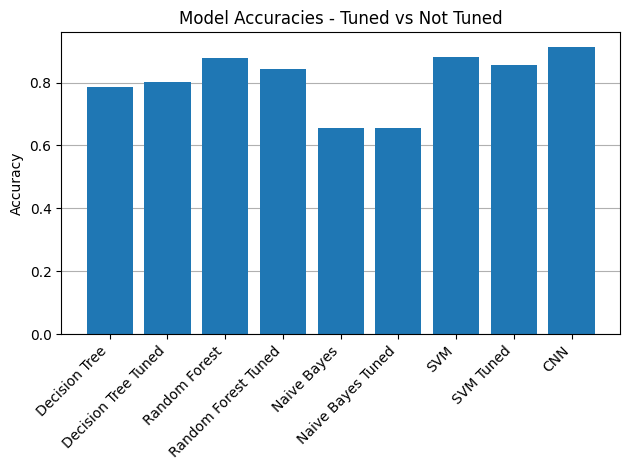

In [105]:
labels = ['Decision Tree', 'Decision Tree Tuned', 'Random Forest', 'Random Forest Tuned', 'Naive Bayes', 'Naive Bayes Tuned', 'SVM', 'SVM Tuned', 'CNN']
accuracies = list((acc_dtc, acc_dtc_tuned, acc_rfc, acc_rfc_tuned, acc_nb, acc_nb_tuned, acc_svm, acc_svm_tuned, acc_cnn))

plt.bar(labels, accuracies)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.tight_layout()
plt.grid(True, axis='y')
plt.gca().set_axisbelow(True)
plt.show()